In [1]:
!nvidia-smi

Sat Jul  2 07:40:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch 

if torch.cuda.is_available():
    device = torch.device('cuda')
    
    print('there are %d GPU(s) available.' % torch.cuda.device_count())
    
    print('we will use the GPU: ', torch.cuda.get_device_name(0))
    
else:
    print("No GPU available, using the GPU instead")
    device = torch.device("cpu")

there are 1 GPU(s) available.
we will use the GPU:  Tesla T4


In [3]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -q -U watermark

In [5]:
!pip install -qq transformers

     |████████████████████████████████| 4.4 MB 32.9 MB/s 
     |████████████████████████████████| 596 kB 71.0 MB/s 
     |████████████████████████████████| 6.6 MB 51.3 MB/s 
     |████████████████████████████████| 101 kB 12.6 MB/s 


In [6]:
!pip install transformers==3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 754 kB 29.6 MB/s 
     |████████████████████████████████| 1.2 MB 66.4 MB/s 
     |████████████████████████████████| 880 kB 54.0 MB/s 
     |████████████████████████████████| 3.0 MB 41.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=04b0a68756bc980ab2d18e0500c326ce1535e1a12c16003f731c9bfb428bfffb
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.20.1
    Uninstalling transformers-4.20.1:
      Successfully uninstalled transformers-4.20.1


In [7]:
import re
import os
from time import time

import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import tensorflow as tf
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedBaggingClassifier

import imblearn as imb
import imblearn.under_sampling
import imblearn.over_sampling
import imblearn.ensemble

In [8]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 3.0.0



In [9]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [10]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import pandas as pd
import re
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string 
import json
from bs4 import BeautifulSoup
import unicodedata
from csv import writer
import nltk
import numpy as np
from nltk.corpus import wordnet
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

nltk.download('stopwords') 
nltk.download('punkt')
set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.


True

In [11]:
from sklearn import metrics

In [12]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import tqdm
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## Import data

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import pandas as pd
dat=pd.read_csv("gdrive/My Drive/Colab Notebooks/aspekmanfaat.csv")
print(dat)

            Date                                               Data  score  \
0     2020-09-17  Hm boleh saya tanya, saya sudah menjadi penuli...      5   
1     2020-09-18  Aku kasih bintang lima karena aplikasi ini ema...      5   
2     2020-09-18  Menarik, bisa menjadi media pembelajaran penul...      5   
3     2020-09-18  Aplikasi terbaik untuk buat yang suka baca.. s...      5   
4     2020-09-19  Saya adalah seorang penulis sekaligus reader. ...      4   
...          ...                                                ...    ...   
1424  2020-10-23  Mohon maaf nih sebelumnya, ada apa dengan watt...      3   
1425  2020-10-23                  bagus bgt buat tempat ngehaluu😭❤️      5   
1426  2020-10-26  Saya sudah setahun dengan aplikasi wattpad ini...      5   
1427  2020-10-26  Bagus banget aplikasinya, banyak cerita yang b...      5   
1428  2020-11-06  Sangat suka banget dengan apk satu ini. Setiap...      5   

                                           Data_Cleaned  
0    

In [16]:
dat.to_csv('dat.csv')
dat.head()

,Date,Data,score,Data_Cleaned
0,2020-09-17,"Hm boleh saya tanya, saya sudah menjadi penuli...",5,penulis lama untung karya karya untung novel u...
1,2020-09-18,Aku kasih bintang lima karena aplikasi ini ema...,5,bintang keren baca cerita cerita keren alangka...
2,2020-09-18,"Menarik, bisa menjadi media pembelajaran penul...",5,tarik media ajar penulis karya hitung logis al...
3,2020-09-18,Aplikasi terbaik untuk buat yang suka baca.. s...,5,suka baca suka baca novel terjemah pintar pili...
4,2020-09-19,Saya adalah seorang penulis sekaligus reader. ...,4,orang tulis pembaca karya suka bantu tulis ver...


In [17]:
dat.shape

(1429, 4)

In [18]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          1429 non-null   object
 1   Data          1429 non-null   object
 2   score         1429 non-null   int64 
 3   Data_Cleaned  1429 non-null   object
dtypes: int64(1), object(3)
memory usage: 44.8+ KB


In [19]:
def to_rating(score):
  rating = int(score)
  if rating <= 2:
    return 0
  elif rating == 3:
    return 1
  else: 
    return 2

dat['rating'] = dat.score.apply(to_rating)

In [20]:
dat.head()

,Date,Data,score,Data_Cleaned,rating
0,2020-09-17,"Hm boleh saya tanya, saya sudah menjadi penuli...",5,penulis lama untung karya karya untung novel u...,2
1,2020-09-18,Aku kasih bintang lima karena aplikasi ini ema...,5,bintang keren baca cerita cerita keren alangka...,2
2,2020-09-18,"Menarik, bisa menjadi media pembelajaran penul...",5,tarik media ajar penulis karya hitung logis al...,2
3,2020-09-18,Aplikasi terbaik untuk buat yang suka baca.. s...,5,suka baca suka baca novel terjemah pintar pili...,2
4,2020-09-19,Saya adalah seorang penulis sekaligus reader. ...,4,orang tulis pembaca karya suka bantu tulis ver...,2


In [21]:
class_names1 = ['negative', 'netral', 'positive']

In [22]:
# tiap sentimen ada berapa ulasan
dat.rating.value_counts()

2    1036
0     288
1     105
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


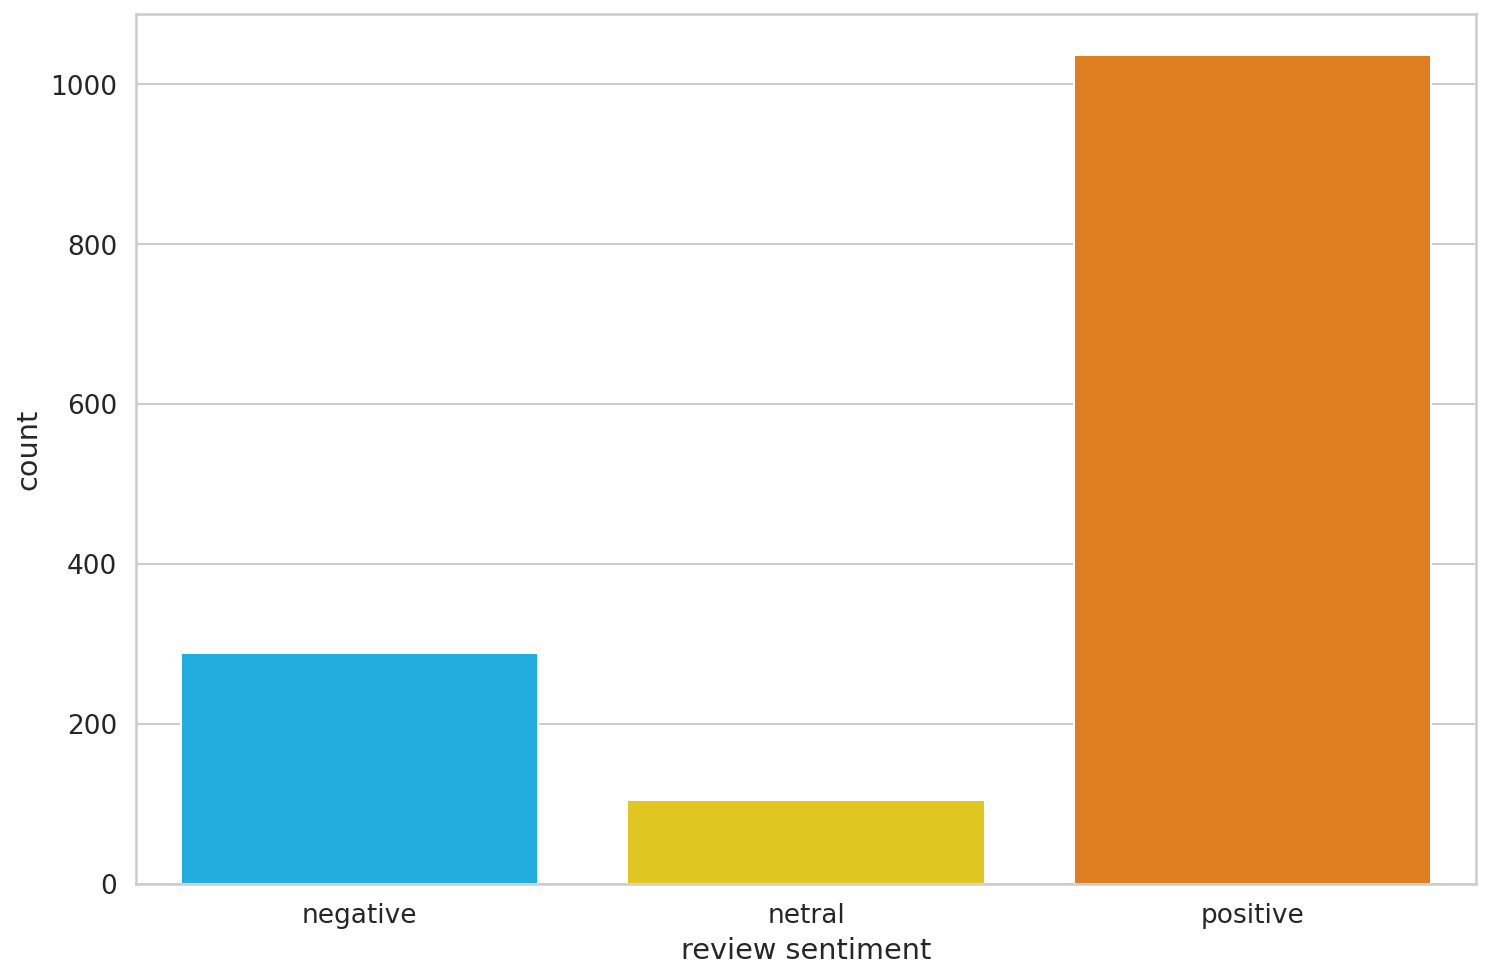

In [23]:
ax = sns.countplot(dat.rating)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names1);

In [24]:
from transformers import BertTokenizer 

print ("Loading Bert Tokenizer")
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

Loading Bert Tokenizer


Downloading:   0%|          | 0.00/229k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

In [25]:
tokenizer.vocab_size

30521

In [26]:
tokenizer.ids_to_tokens

OrderedDict([(0, '[PAD]'),
             (1, '[UNK]'),
             (2, '[CLS]'),
             (3, '[SEP]'),
             (4, '[MASK]'),
             (5, '##an'),
             (6, 'd'),
             (7, '##er'),
             (8, 'm'),
             (9, '##en'),
             (10, 's'),
             (11, 'p'),
             (12, '##ar'),
             (13, 'b'),
             (14, 'k'),
             (15, '##at'),
             (16, '##ang'),
             (17, '##in'),
             (18, 't'),
             (19, '##ak'),
             (20, '##al'),
             (21, '##ah'),
             (22, '##as'),
             (23, '##un'),
             (24, '##am'),
             (25, '##em'),
             (26, 'di'),
             (27, '##ya'),
             (28, '##el'),
             (29, '##ad'),
             (30, '##eng'),
             (31, 'y'),
             (32, '##kan'),
             (33, '##tu'),
             (34, 'yang'),
             (35, 'se'),
             (36, '##ap'),
             (37, '##is'),
   

In [27]:
sentences = dat.Data_Cleaned.values
labels = dat.rating.values

In [28]:
tokens = tokenizer.tokenize(sentences[0])
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sentences[0]}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: penulis lama untung karya karya untung novel untung
   Tokens: ['penulis', 'lama', 'untung', 'karya', 'karya', 'untung', 'novel', 'untung']
Token IDs: [1930, 985, 5133, 1318, 1318, 5133, 5601, 5133]


In [29]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 3)

In [30]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 2)

In [31]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [32]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 1)

In [33]:
encoding = tokenizer.encode_plus(
  sentences[0],
  max_length=64,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation=True,
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [34]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

64


tensor([   2, 1930,  985, 5133, 1318, 1318, 5133, 5601, 5133,    3,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0])

In [35]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

64


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [36]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'penulis',
 'lama',
 'untung',
 'karya',
 'karya',
 'untung',
 'novel',
 'untung',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [37]:
import logging
logging.basicConfig(level=logging.ERROR)

In [38]:
token_lens = []

for txt in dat.Data_Cleaned:
  tokens = tokenizer.encode(txt, max_length=75)
  token_lens.append(len(tokens))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


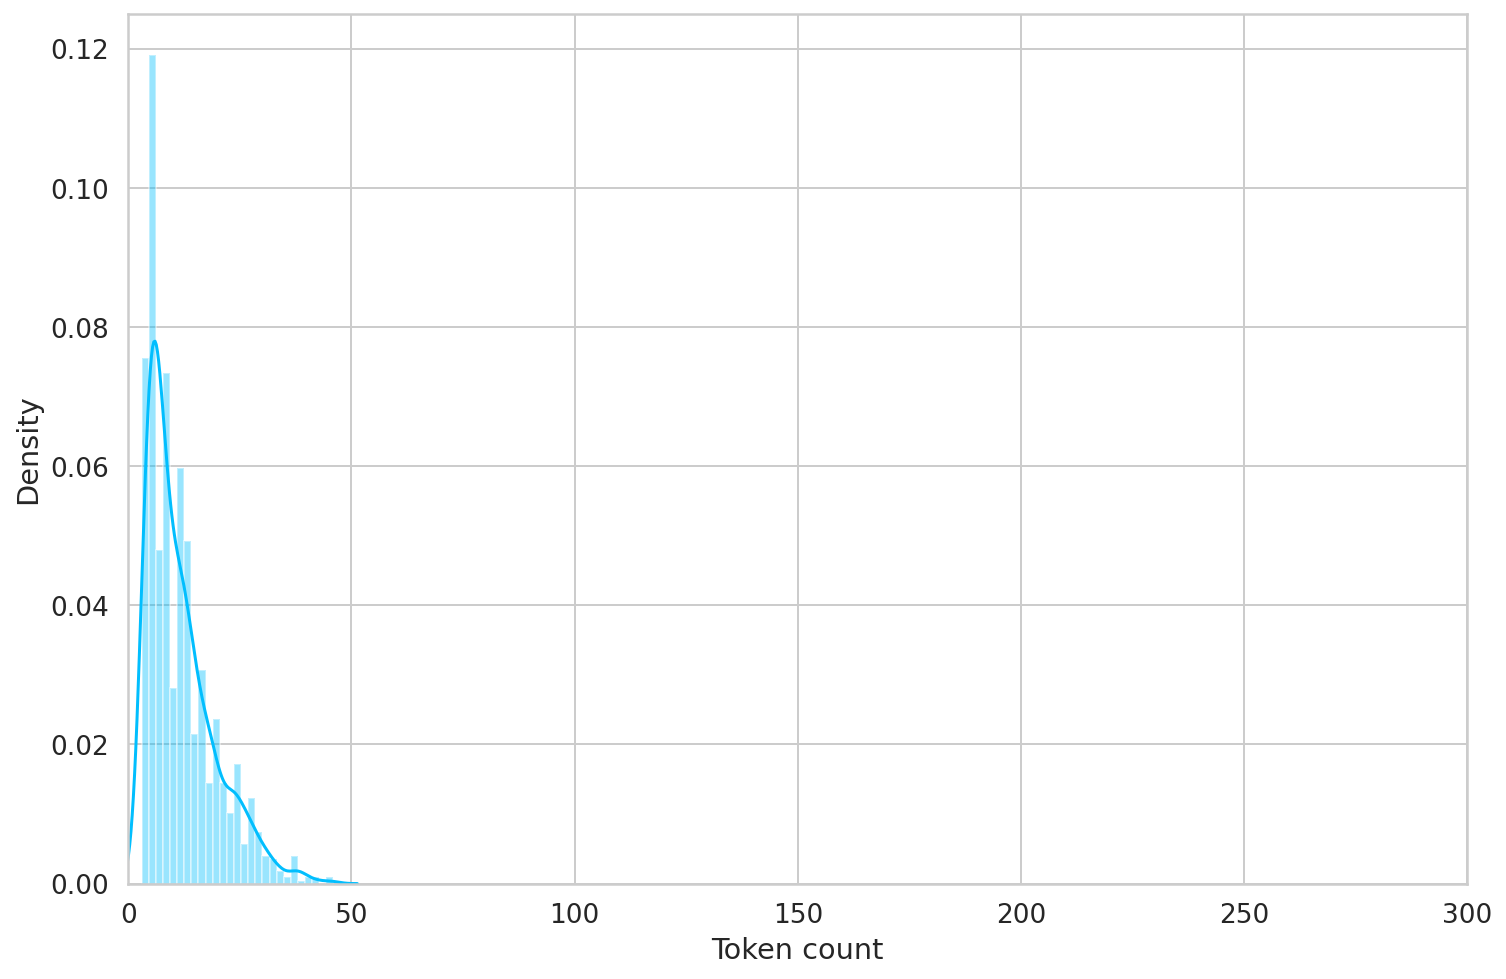

In [39]:
sns.distplot(token_lens)
plt.xlim([0, 300]);
plt.xlabel('Token count');

In [40]:
MAX_LEN = 64

In [41]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [42]:
X_train, X_test, y_train, y_test = train_test_split(dat,dat['rating'], test_size=1/3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.8, random_state=42)

In [43]:
X_train.shape, X_val.shape, X_test.shape

((952, 5), (95, 5), (382, 5))

In [44]:
X_train

,Date,Data,score,Data_Cleaned,rating
405,2020-11-12,"Suka banget sama aplikasi ini, tapi aku mau ny...",5,suka nyaranin milik coba kembang nulis ngasilk...,2
909,2021-01-11,"Bagus, banyak cerita menarik juga di aplikasi ...",5,bagus cerita tarik,2
1347,2021-03-10,"4 dulu ya maaf kalo cuma kasih bintang itu,kar...",4,bintang baca luar jaringan batas nganggur nga ...,2
1027,2021-01-25,Saya suka sekali dengan wattpad ceritanya bagu...,5,suka cerita bagus bagus baca cerita bagus,2
978,2021-01-19,Saya mau protes jadi setiap saya lagi bikin ce...,5,protes cerita sengaja klik batal nyesek mencet...,2
...,...,...,...,...,...
1095,2021-02-02,Apk nya bagus sih..... cuma kok makin lama ma...,3,aplikasi bagus lama sulit baca komik terjemahi...,1
1130,2021-02-08,Aplikasi yang bagus bagi seseorang yang suka m...,5,bagus orang suka baca novel beli novel,2
1294,2021-03-03,Ceritanya bagus bagus rekom buat kalian yang s...,5,cerita bagus bagus rekom suka baca baca cari i...,2
860,2021-01-06,seru banyak cerita diwp tersebut .,5,seru cerita di,2


In [45]:
y_train

405     2
909     2
1347    2
1027    2
978     2
       ..
1095    1
1130    2
1294    2
860     2
1126    0
Name: rating, Length: 952, dtype: int64

##BERT

In [46]:
def create_data_loader(dat, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews = dat.Data_Cleaned.to_numpy(),
    targets = dat.rating.to_numpy(),
    tokenizer = tokenizer,
    max_len = max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [47]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(X_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [48]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}

In [49]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [50]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32])


In [51]:
from transformers import BertTokenizer, AutoModel

PRE_TRAINED_MODEL_NAME = "indobenchmark/indobert-base-p1"
bert_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/498M [00:00<?, ?B/s]

In [52]:
last_hidden_state.shape

torch.Size([1, 64, 768])

In [53]:
bert_model.config.hidden_size

768

In [54]:
pooled_output.shape

torch.Size([1, 768])

In [55]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [56]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [57]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from itertools import cycle

In [58]:
model = SentimentClassifier(len(class_names1))
model = model.to(device)

In [59]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 64])
torch.Size([32, 64])


In [60]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3764, 0.3156, 0.3079],
        [0.4697, 0.2491, 0.2812],
        [0.3246, 0.3809, 0.2944],
        [0.3243, 0.2766, 0.3991],
        [0.3430, 0.3951, 0.2619],
        [0.3659, 0.3425, 0.2916],
        [0.3729, 0.2980, 0.3291],
        [0.3583, 0.3139, 0.3278],
        [0.3847, 0.3111, 0.3042],
        [0.3235, 0.3940, 0.2825],
        [0.3569, 0.3426, 0.3005],
        [0.4135, 0.3042, 0.2822],
        [0.4752, 0.3008, 0.2240],
        [0.4484, 0.3442, 0.2074],
        [0.4023, 0.2999, 0.2978],
        [0.3573, 0.3350, 0.3077],
        [0.3397, 0.3834, 0.2769],
        [0.3693, 0.3101, 0.3206],
        [0.3086, 0.3085, 0.3829],
        [0.3903, 0.3386, 0.2711],
        [0.4283, 0.3296, 0.2421],
        [0.4114, 0.2660, 0.3226],
        [0.3990, 0.3346, 0.2665],
        [0.4038, 0.3191, 0.2771],
        [0.3867, 0.3035, 0.3098],
        [0.4459, 0.3191, 0.2351],
        [0.3495, 0.3403, 0.3102],
        [0.3964, 0.3465, 0.2571],
        [0.3713, 0.3330, 0.2958],
        [0.439

In [61]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [62]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [63]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [64]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [65]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.6880698591470719 accuracy 0.7331932773109243
Val   loss 0.4457201460997264 accuracy 0.8105263157894737

Epoch 2/4
----------
Train loss 0.4714729701479276 accuracy 0.8224789915966386
Val   loss 0.5106574694315592 accuracy 0.8315789473684211

Epoch 3/4
----------
Train loss 0.31112774883707367 accuracy 0.8865546218487395
Val   loss 0.5302960574626923 accuracy 0.8315789473684211

Epoch 4/4
----------
Train loss 0.21528827846050264 accuracy 0.9285714285714285
Val   loss 0.5741021931171417 accuracy 0.7684210526315789

CPU times: user 27.4 s, sys: 14.1 s, total: 41.6 s
Wall time: 44.4 s


In [66]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7684210526315789

In [67]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7643979057591623

In [68]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [69]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [70]:
y_test.shape

torch.Size([382])

In [71]:
print(classification_report(y_test, y_pred, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.56      0.62      0.59        78
      netral       0.25      0.06      0.10        33
    positive       0.84      0.89      0.86       271

    accuracy                           0.76       382
   macro avg       0.55      0.52      0.52       382
weighted avg       0.73      0.76      0.74       382



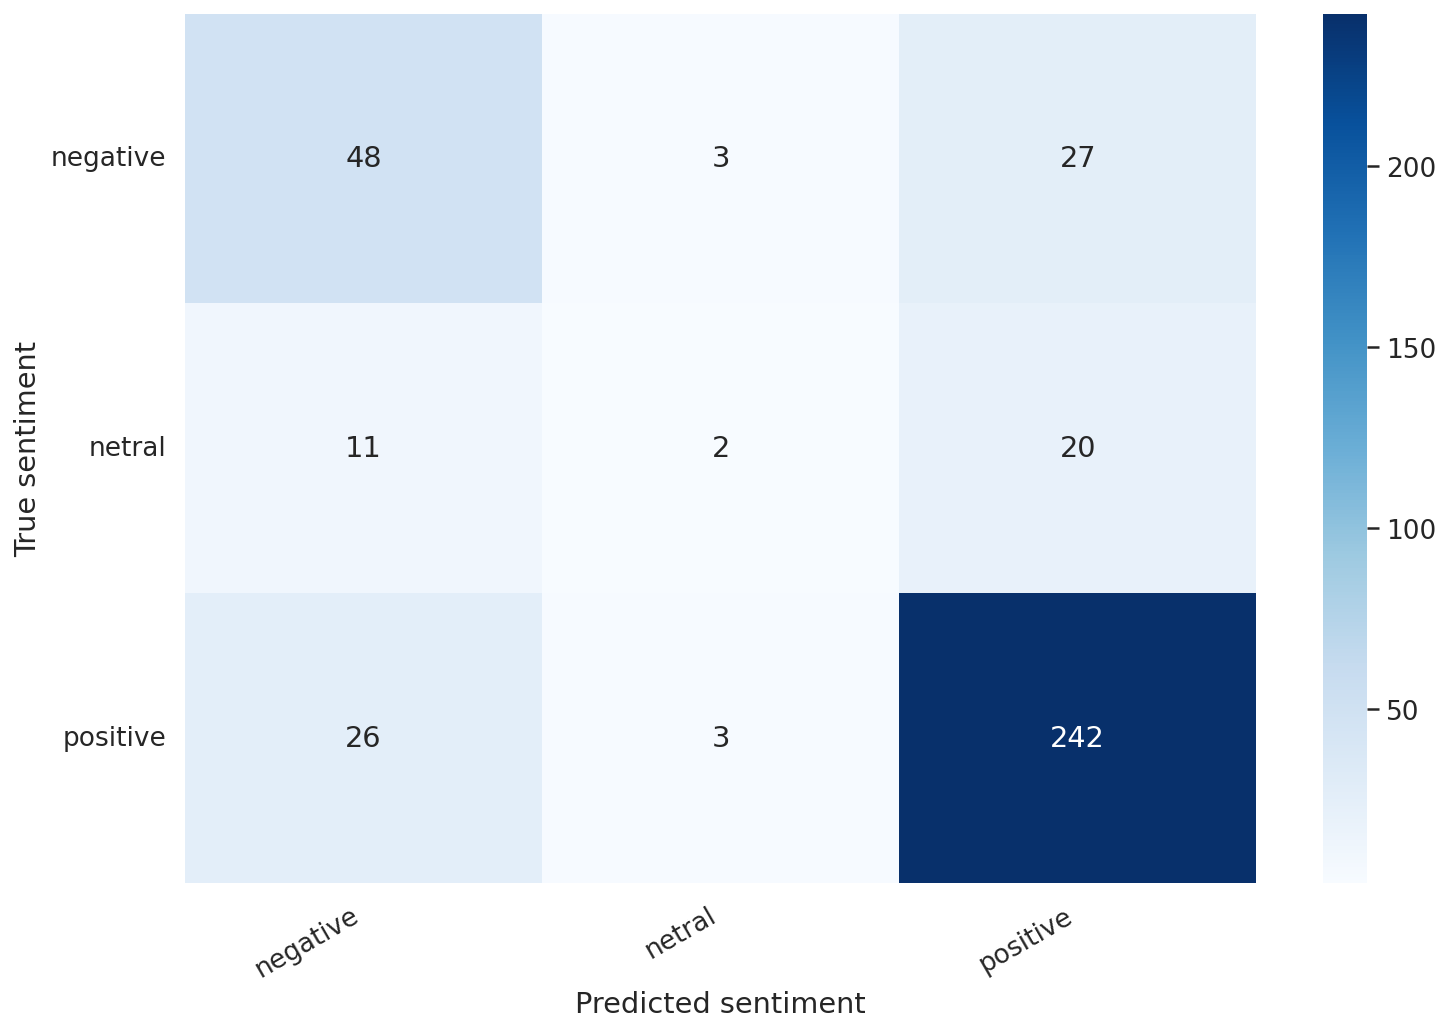

In [72]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

In [73]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix , classification_report , roc_curve, auc, roc_auc_score

ROC AUC score: 0.8937837504454375


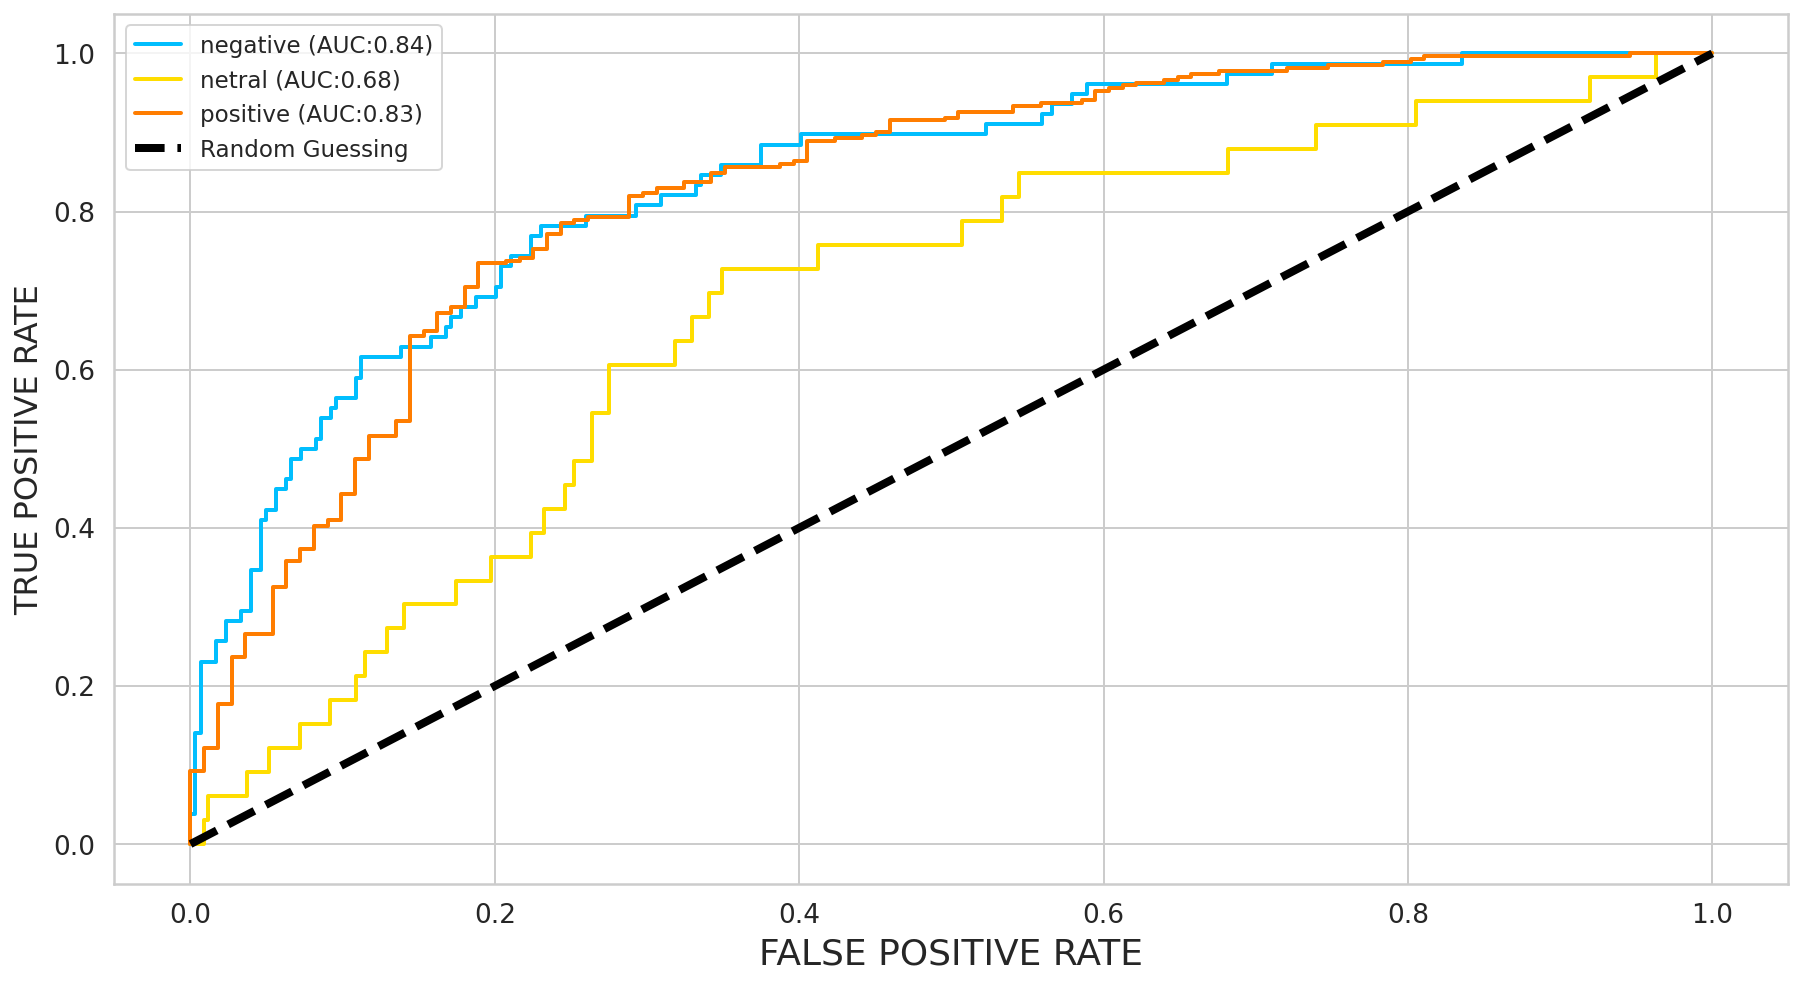

In [74]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

In [75]:
idx = 7

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [76]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

orang tulis baca kecewa bantu tulis aplikasi forum luas tulis sesi
habis coba daftar akun jujur kecewa pakai akun akun eror

True sentiment: negative


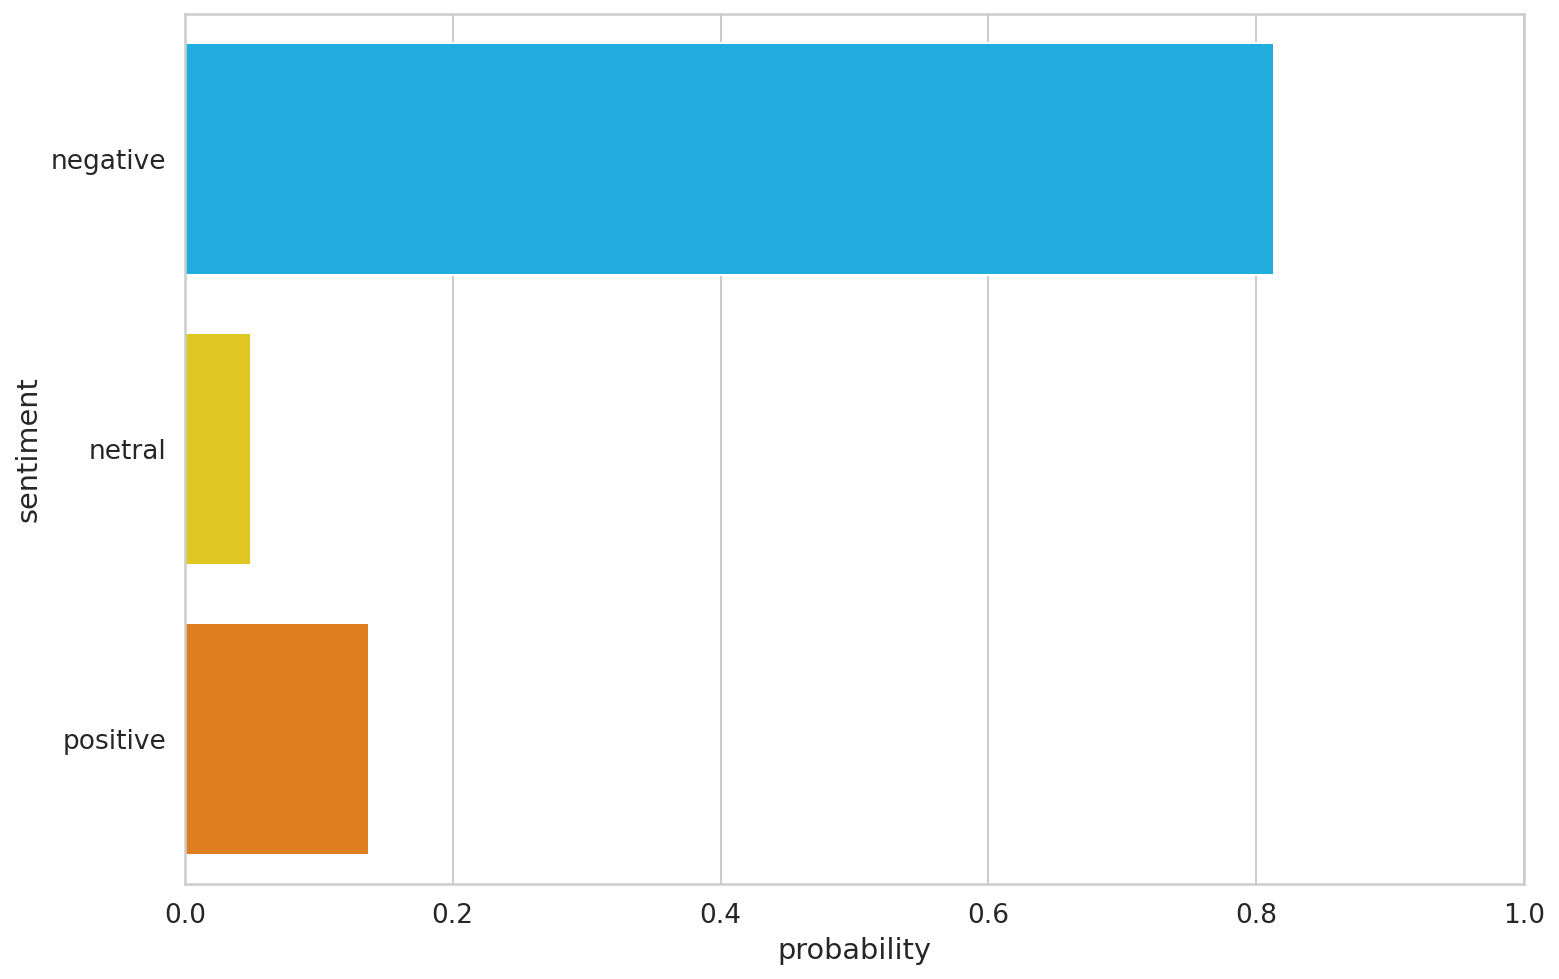

In [77]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [78]:
review_text = "HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶"

In [79]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [80]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names1[prediction]}')

Review text: HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶
Sentiment  : negative


In [81]:
idx = 18

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [82]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

bagus cerita inspirasi hidup

True sentiment: positive


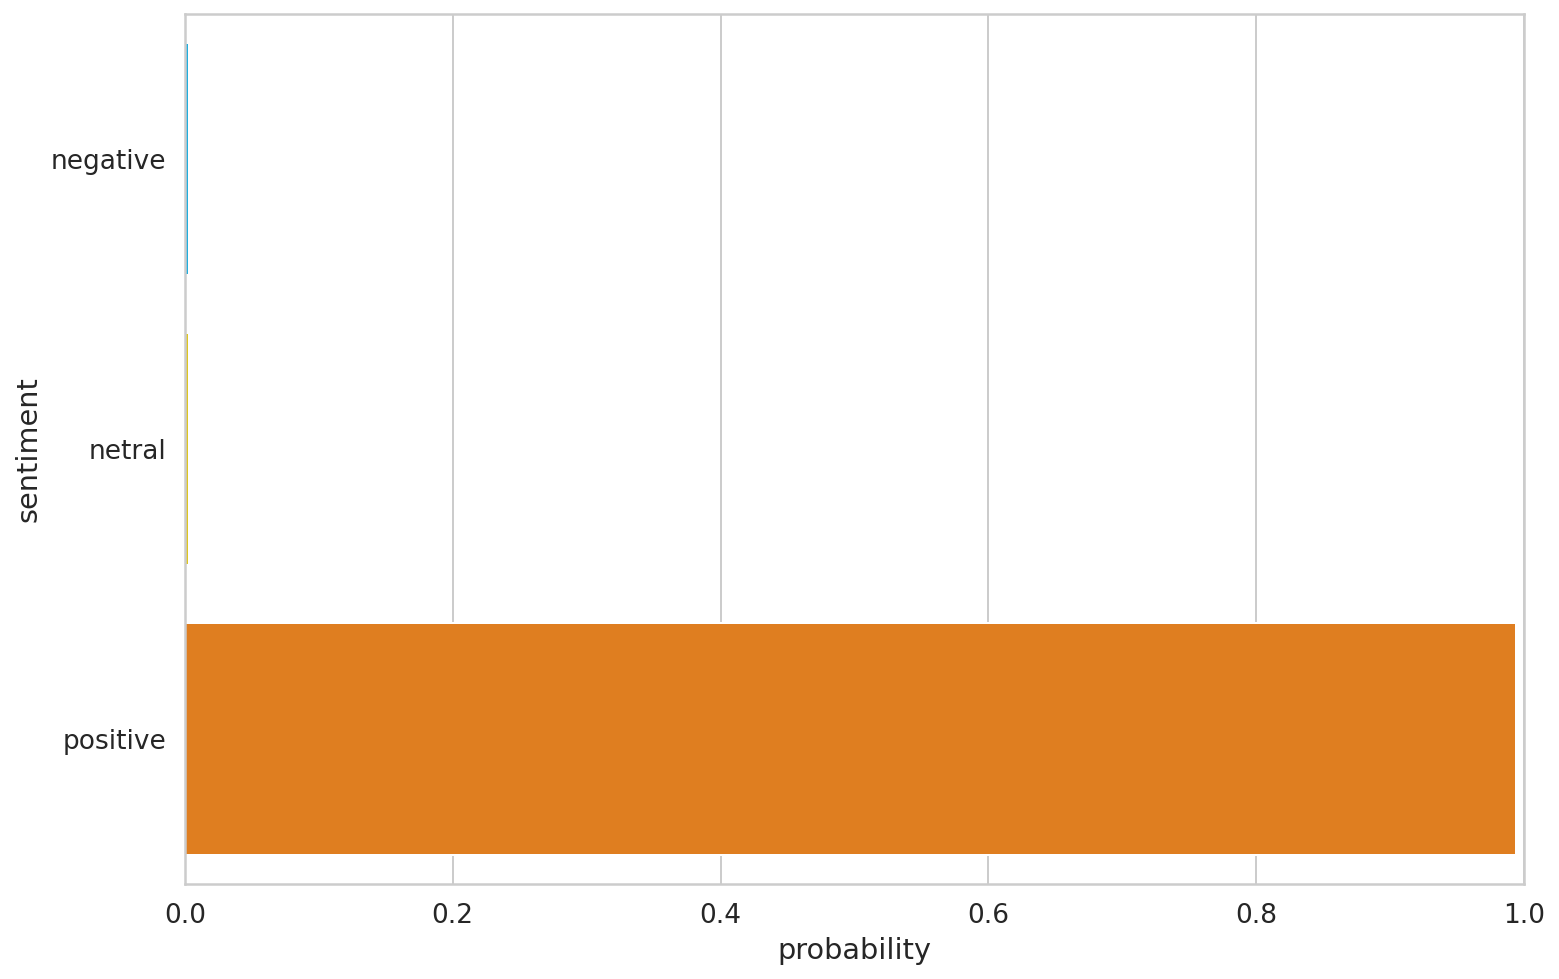

In [83]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [84]:
idx = 12

review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_dat = pd.DataFrame({
  'class_names': class_names1,
  'values': y_pred_probs[idx]
})

In [85]:
print("\n".join(wrap(review_text)))
print()
print(f'True sentiment: {class_names1[true_sentiment]}')

suka halusinasin lancar

True sentiment: positive


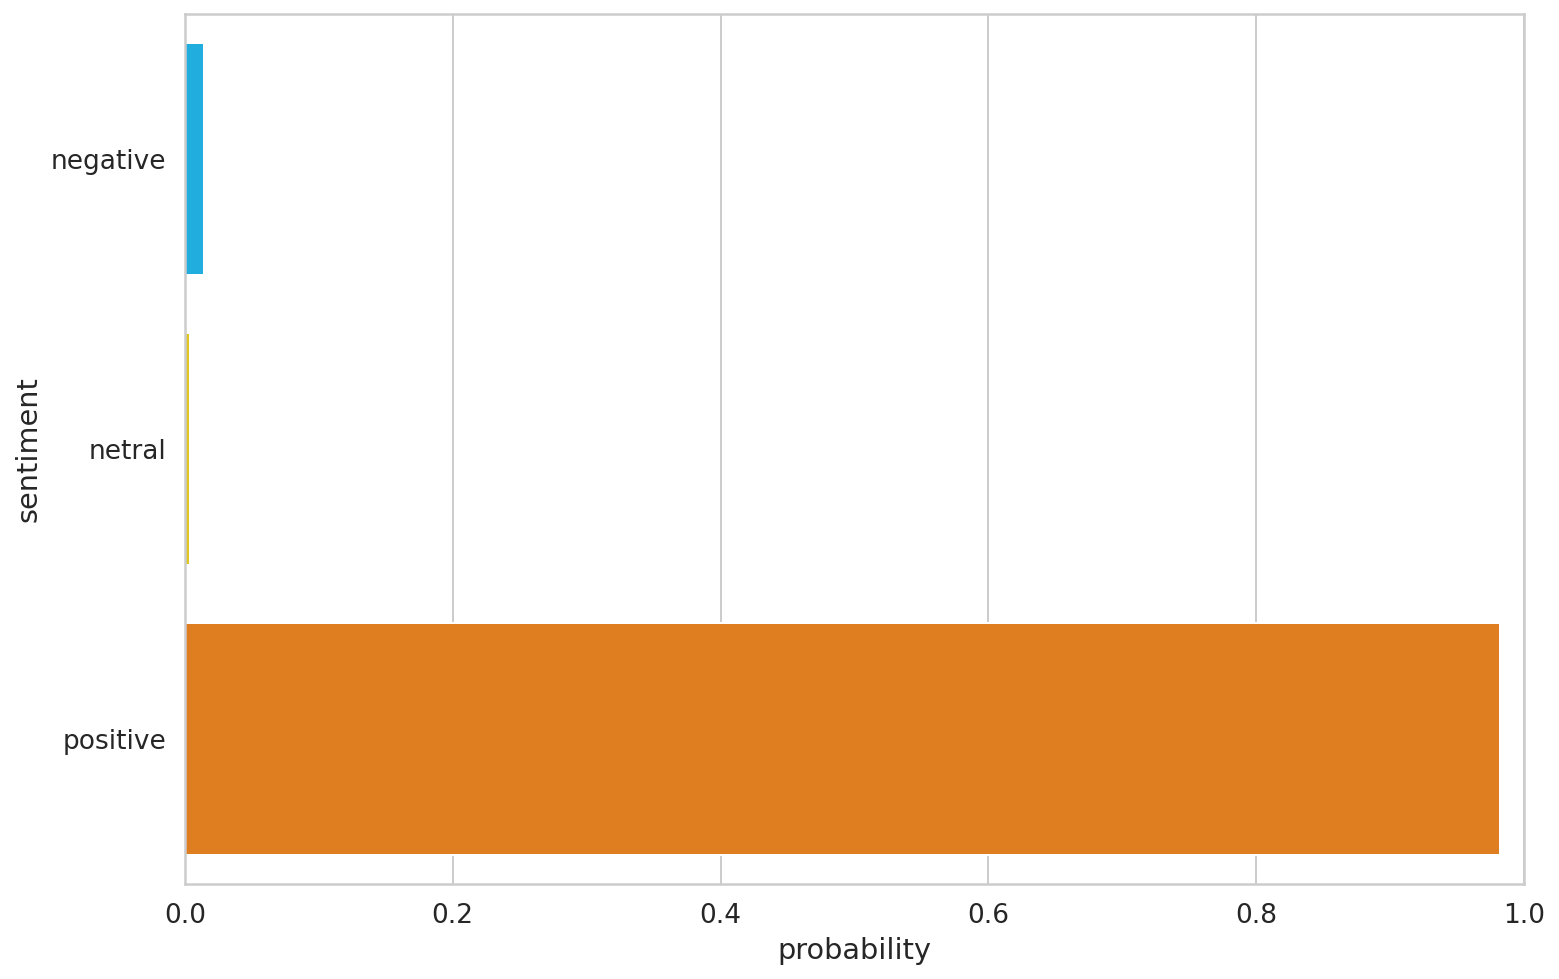

In [86]:
sns.barplot(x='values', y='class_names', data=pred_dat, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [87]:
review_text = "HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶"

In [88]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [89]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names1[prediction]}')

Review text: HUAAAA tolong ini kenapa, gue gak bisa masuk ke akun gue, disuruh riset sandi mulu. Moga besok bisa. Tolong yang buat ini aplikasi bantu gue!!!! Cerita gue ada disana semua, nanti kalo udah bisa masuk ke akun gue, gue edit deh tu bintang biar lima à¼Žàº¶â€¿à¼Žàº¶
Sentiment  : negative


## 2e-5

In [90]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [91]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [92]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [93]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [94]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.4263868113358816 accuracy 0.8340336134453781
Val   loss 0.5439063111941019 accuracy 0.7894736842105263

Epoch 2/4
----------
Train loss 0.2542408504833778 accuracy 0.907563025210084
Val   loss 0.827073335647583 accuracy 0.7789473684210526

Epoch 3/4
----------
Train loss 0.11049281029651563 accuracy 0.9611344537815125
Val   loss 0.8304132024447123 accuracy 0.8105263157894737

Epoch 4/4
----------
Train loss 0.048829185271946095 accuracy 0.9821428571428571
Val   loss 0.9499642451604208 accuracy 0.7578947368421053

CPU times: user 28.5 s, sys: 14.6 s, total: 43.2 s
Wall time: 46 s


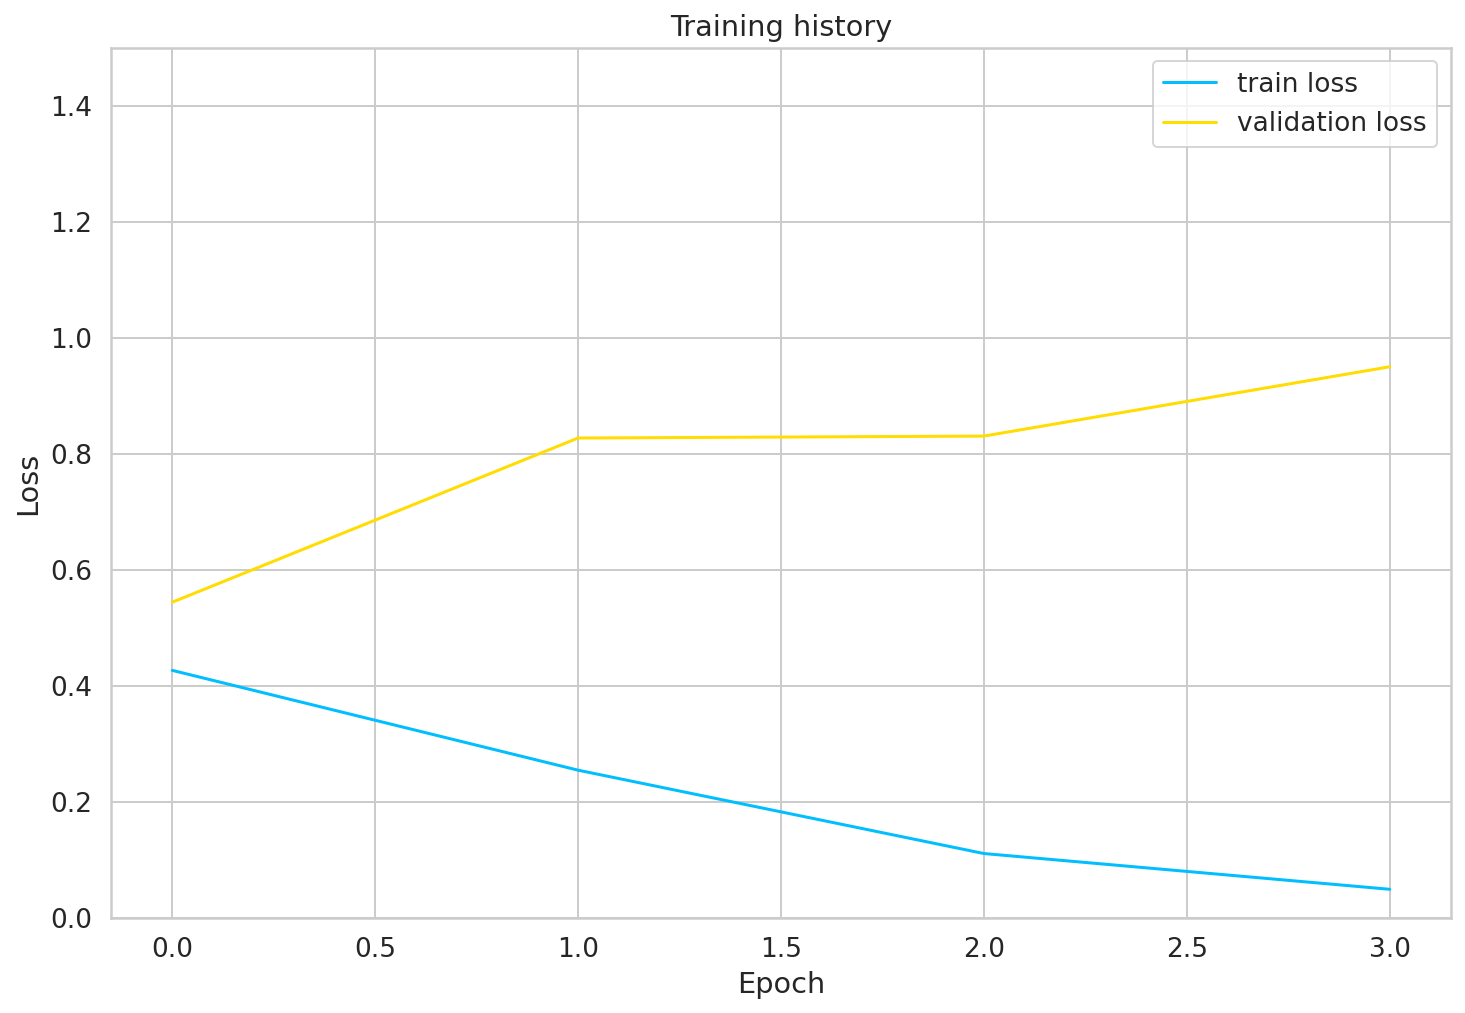

In [95]:
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1.5]);

In [96]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7578947368421053

In [97]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7486910994764399

In [98]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [99]:
y_review_texts, y_pred2, y_pred_probs2, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [100]:
print(classification_report(y_test, y_pred2, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.51      0.64      0.57        78
      netral       0.30      0.09      0.14        33
    positive       0.85      0.86      0.86       271

    accuracy                           0.75       382
   macro avg       0.55      0.53      0.52       382
weighted avg       0.73      0.75      0.73       382



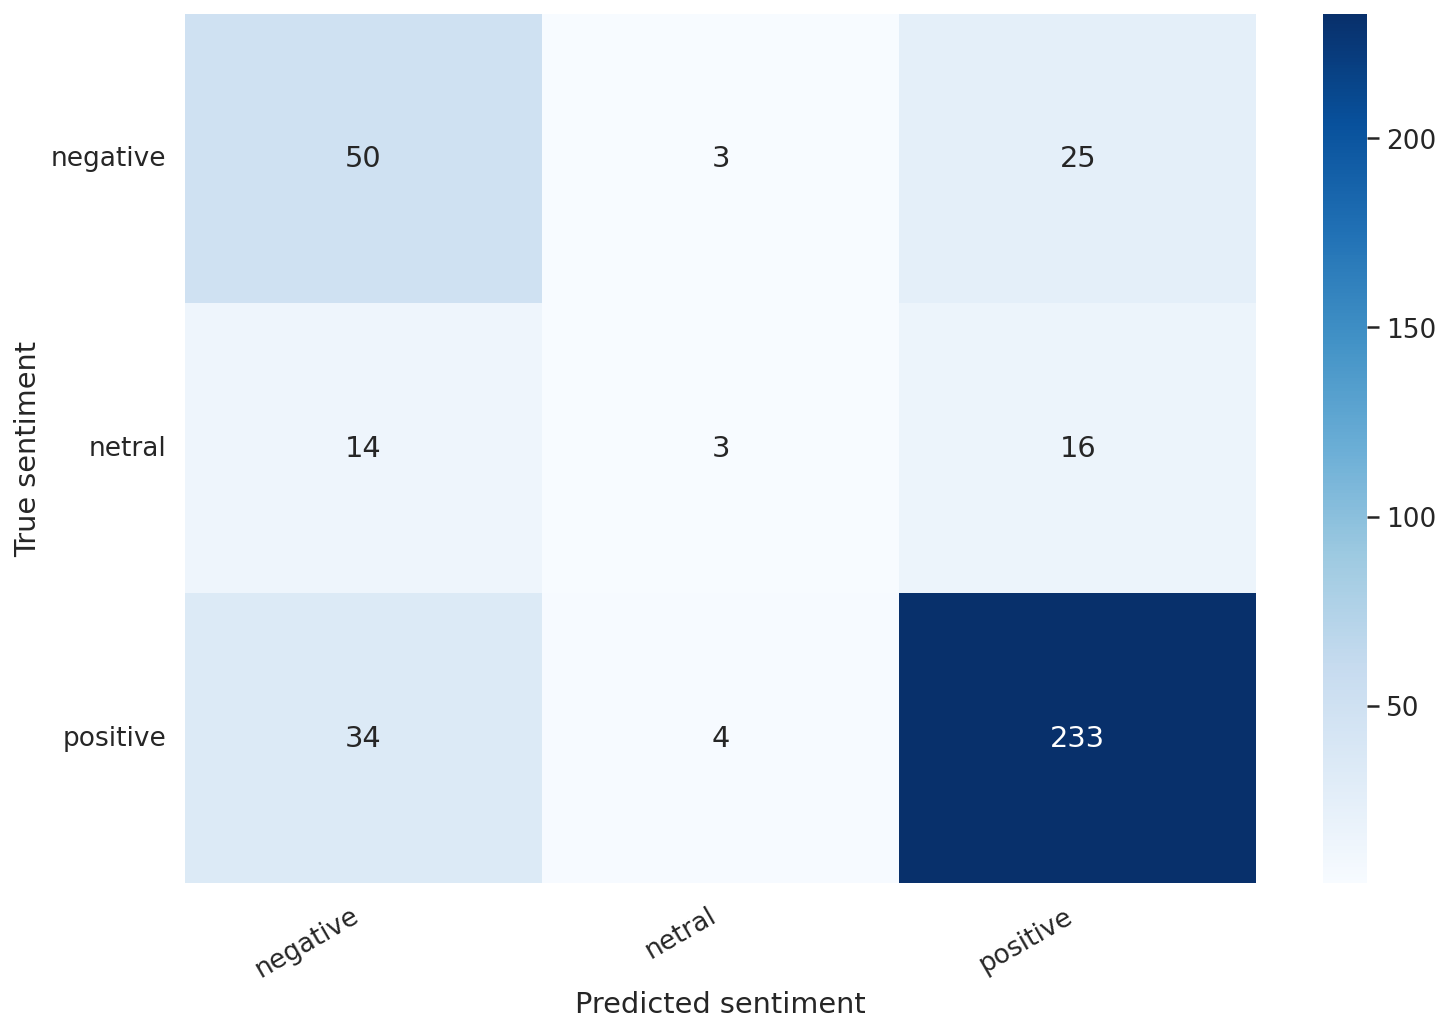

In [101]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred2)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.8812429757956196


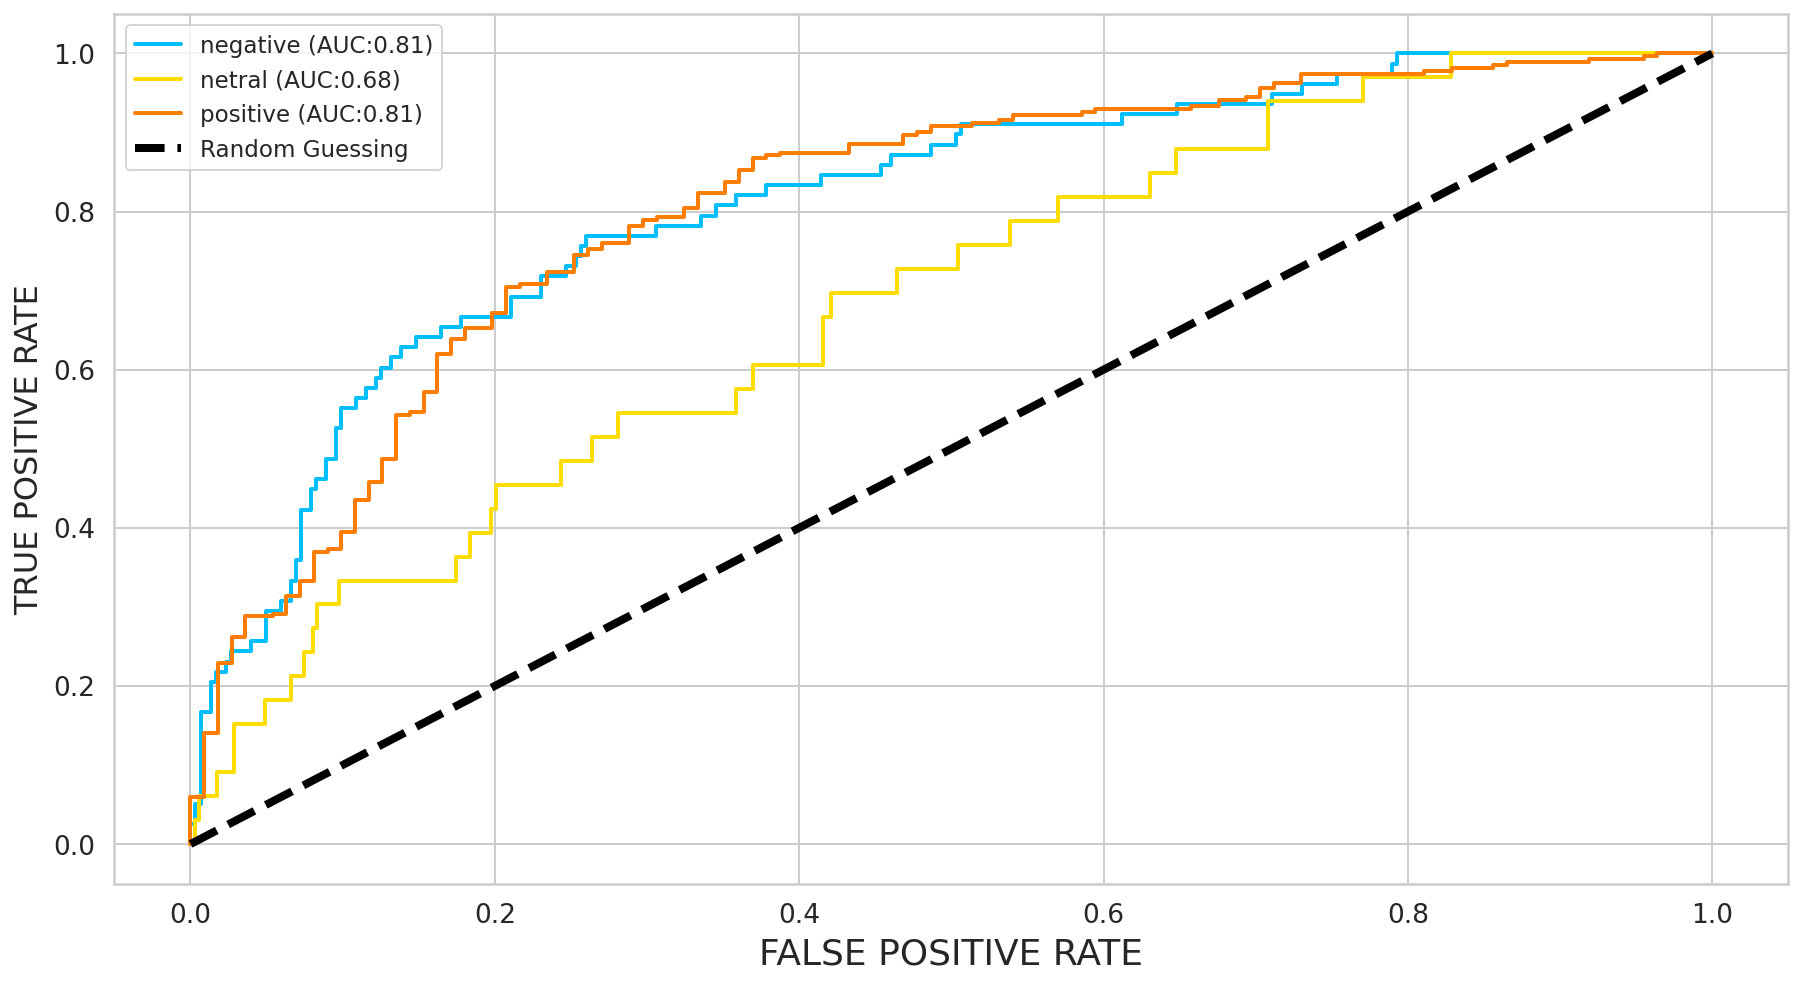

In [102]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs2 , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

##3e-5

In [103]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=3e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [104]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [105]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [106]:
import gc
gc.collect()
torch.cuda.empty_cache()


In [107]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.34934356169154246 accuracy 0.8728991596638656
Val   loss 0.7156101663907369 accuracy 0.7684210526315789

Epoch 2/4
----------
Train loss 0.2634126342833042 accuracy 0.9023109243697479
Val   loss 0.636802981297175 accuracy 0.8210526315789474

Epoch 3/4
----------
Train loss 0.10106896930374205 accuracy 0.9705882352941176
Val   loss 0.706976999839147 accuracy 0.8631578947368421

Epoch 4/4
----------
Train loss 0.0521849845846494 accuracy 0.9842436974789915
Val   loss 0.6519528230031332 accuracy 0.8526315789473684

CPU times: user 30.2 s, sys: 15.5 s, total: 45.7 s
Wall time: 49.1 s


In [108]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val)
)


val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.8526315789473684

In [109]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.7460732984293195

In [110]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [111]:
y_review_texts, y_pred3, y_pred_probs3, y_test = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [112]:
print(classification_report(y_test, y_pred3, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.49      0.56      0.52        78
      netral       0.25      0.06      0.10        33
    positive       0.84      0.88      0.86       271

    accuracy                           0.75       382
   macro avg       0.53      0.50      0.49       382
weighted avg       0.72      0.75      0.73       382



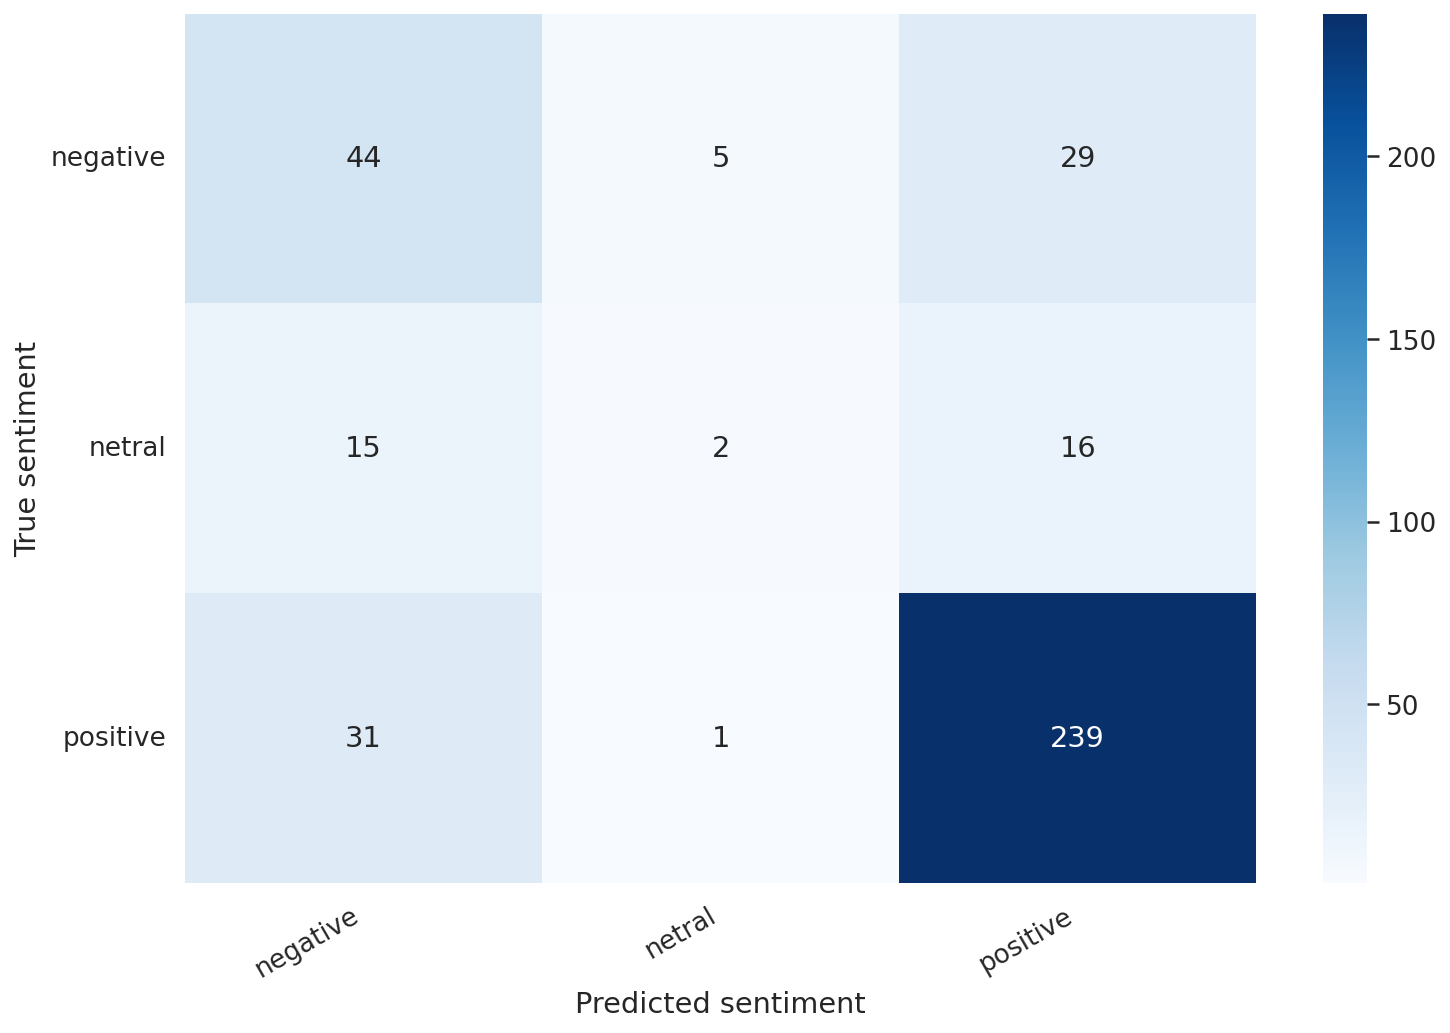

In [113]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred3)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.8773573915188728


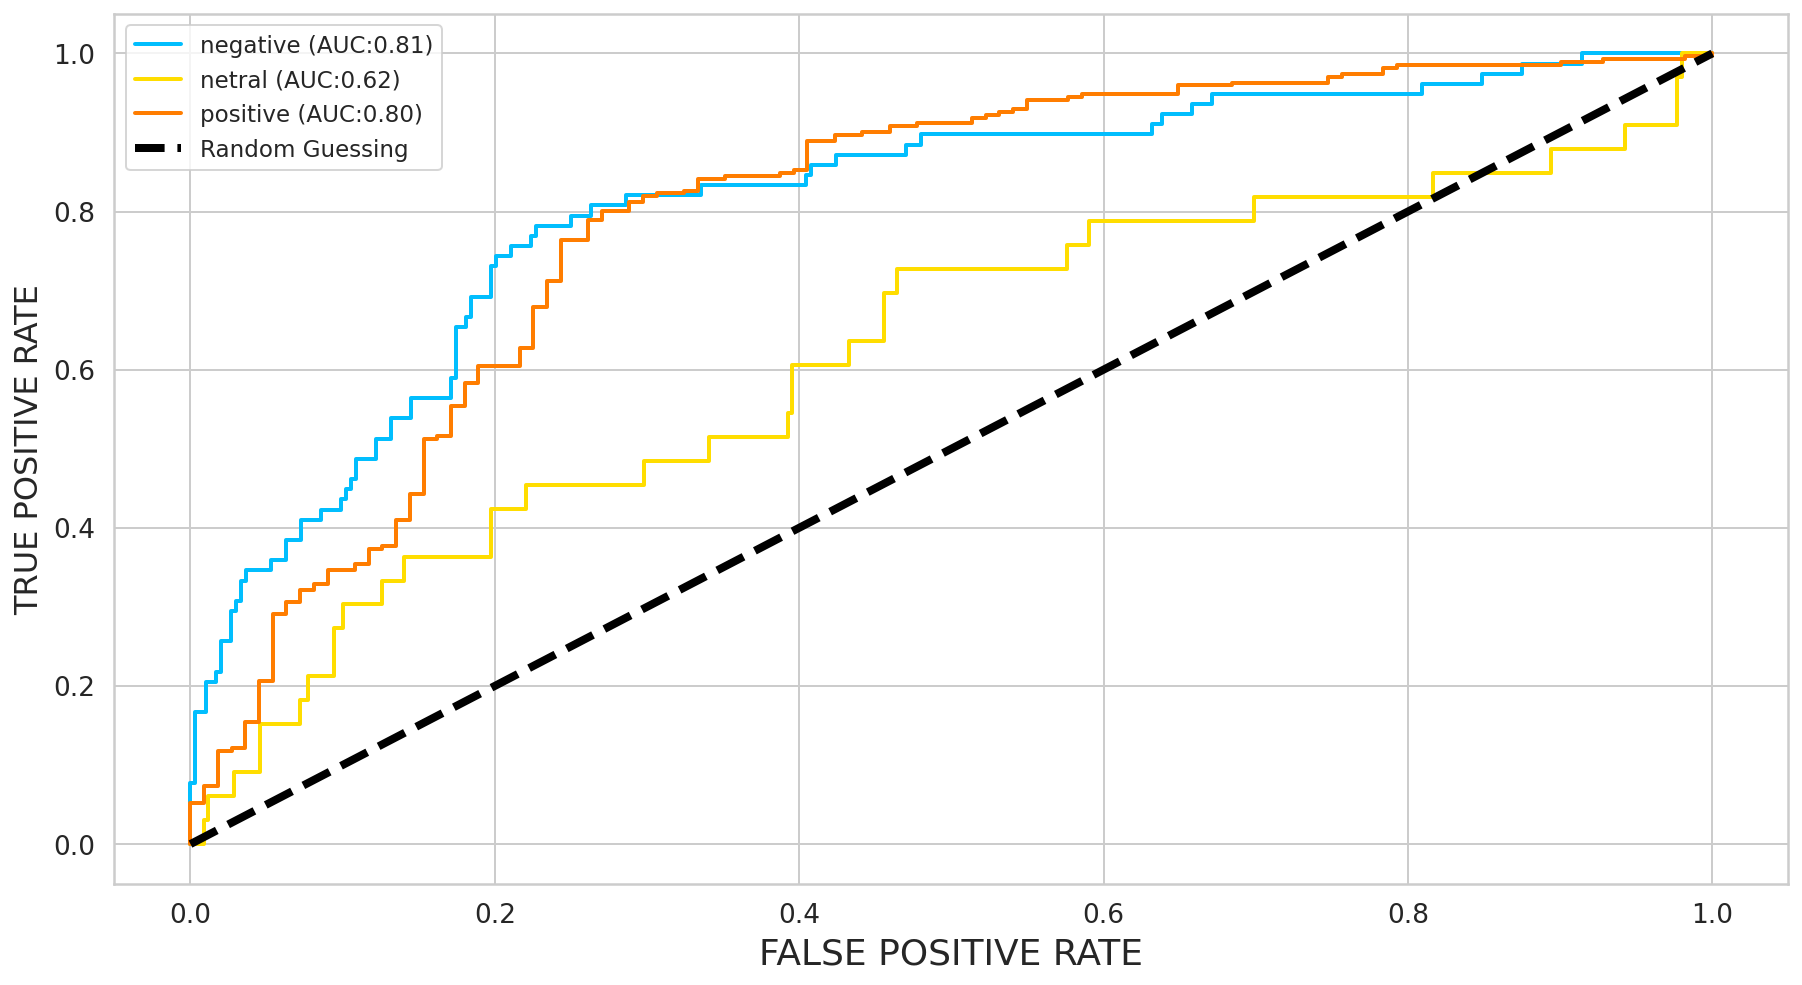

In [114]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test , y_pred_probs3 , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();

##SMOTE

In [115]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [116]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

# Stemming
from nltk.stem import PorterStemmer

In [117]:
global stopwords_list  

stopwords_list = stopwords.words('english')

In [118]:
class clean_tweet(BaseEstimator,TransformerMixin):
    
    def __init__(self):
        print('init called')
    
    def fit(self,X,y=None):
        print('fit called')
        return self
       
    def transform(self, X, y = None):
        
        print('transform called')
        
        X_1 = X.copy()
  
        def clean_tweet_func(tweet):

            if type(tweet) == float:
                return ""

            temp = tweet.lower()
            temp = re.sub("'", "", temp) # to avoid removing contractions in english
            temp = re.sub("@[A-Za-z0-9_]+","", temp)
            temp = re.sub("#[A-Za-z0-9_]+","", temp)
            temp = re.sub(r'http\S+', '', temp)
            temp = re.sub('[()!?]', ' ', temp)
            temp = re.sub('\[.*?\]',' ', temp)
            temp = re.sub("[^a-z0-9]"," ", temp)
            temp = temp.split()
            temp = [w for w in temp if not w in stopwords_list]


            #Instantiate stemming class
            stemmer = PorterStemmer()

            #Creating a list of stems of words in tweet
            tweets_stem = []
            for word in temp:
                stem_word = stemmer.stem(word)
                tweets_stem.append(stem_word)

            tweets_stem = " ".join(word for word in tweets_stem)

            return tweets_stem
        
        X_1 = X_1.apply(lambda x: clean_tweet_func(x))
        
        return X_1

In [119]:
X_train, X_test, y_train, y_test = train_test_split(dat['Data_Cleaned'],dat['rating'], test_size=1/3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.8, random_state=42)

In [120]:
y_train.value_counts()

2    689
0    194
1     69
Name: rating, dtype: int64

In [121]:
text_transformer = Pipeline(steps = [('cleaner',clean_tweet()),
                                    ('vectorize_text',TfidfVectorizer(ngram_range=(1,2), max_features=500000))])

init called


In [122]:
# fit the pipeline on train data

text_transformer.fit(X_train)

X_train_text_vectorised = text_transformer.transform(X_train)

fit called
transform called
transform called


In [123]:
# transform the test data with the pipeline

X_val_text_vectorised = text_transformer.transform(X_val)

transform called


In [124]:
# transform the test data with the pipeline

X_test_text_vectorised = text_transformer.transform(X_test)

transform called


In [125]:
# SMOTE on the training data

from imblearn.over_sampling import SMOTE

sm_model = SMOTE()
X_train_res, y_train_res = sm_model.fit_resample(X_train_text_vectorised, y_train) 

In [126]:
X_train.shape, y_train.shape

((952,), (952,))

In [127]:
X_train_res.shape, y_train_res.shape

((2067, 6308), (2067,))

In [128]:
y_train_res.value_counts()

2    689
0    689
1    689
Name: rating, dtype: int64

In [129]:
## Splitting the dataset into Train and Test
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_res,y_train_res, test_size=1/3, random_state=42)
X_val_, X_test_, y_val_, y_test_ = train_test_split(X_test_,y_test_, test_size=0.8, random_state=42)

In [130]:
X_train_ = X_train_.todense()
X_test_ = X_test_.todense()
X_val_ = X_val_.todense()

In [131]:
def create_data_loader(X, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    reviews = dat.Data_Cleaned.to_numpy(),
    targets = dat.rating.to_numpy(),
    tokenizer = tokenizer,
    max_len = max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [132]:
BATCH_SIZE = 32

train_data_loader = create_data_loader(X_train_, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(X_val_, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test_, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [133]:
def encode_reviews(tokenizer, reviews, max_length):
    token_ids = np.zeros(shape=(len(reviews), max_length),
                         dtype=np.int32)
    for i, review in enumerate(reviews):
        encoded = tokenizer.encode(review, max_length=max_length)
        token_ids[i, 0:len(encoded)] = encoded
    attention_mask = (token_ids != 0).astype(np.int32)
    return {"input_ids": token_ids, "attention_mask": attention_mask}

In [134]:
data = next(iter(train_data_loader))
data.keys()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [135]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([32, 64])
torch.Size([32, 64])
torch.Size([32])


In [136]:
from transformers import BertTokenizer, AutoModel

PRE_TRAINED_MODEL_NAME = 'indobenchmark/indobert-base-p1'
bert_model = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'], 
  attention_mask=encoding['attention_mask']
)

In [137]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.1)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [138]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [139]:
model = SentimentClassifier(len(class_names1))
model = model.to(device)

In [140]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([32, 64])
torch.Size([32, 64])


In [141]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.4875, 0.2092, 0.3033],
        [0.3777, 0.2893, 0.3331],
        [0.2962, 0.3209, 0.3829],
        [0.4038, 0.2119, 0.3843],
        [0.4344, 0.2389, 0.3266],
        [0.3623, 0.3543, 0.2834],
        [0.4015, 0.2705, 0.3281],
        [0.3976, 0.2508, 0.3516],
        [0.3630, 0.2717, 0.3653],
        [0.3816, 0.2850, 0.3333],
        [0.4107, 0.2078, 0.3815],
        [0.3049, 0.3191, 0.3760],
        [0.4195, 0.2921, 0.2884],
        [0.4132, 0.2718, 0.3150],
        [0.3695, 0.2647, 0.3658],
        [0.4240, 0.2773, 0.2986],
        [0.5062, 0.2131, 0.2808],
        [0.5006, 0.2433, 0.2561],
        [0.3924, 0.2755, 0.3321],
        [0.3349, 0.2274, 0.4377],
        [0.3381, 0.3351, 0.3268],
        [0.4289, 0.2336, 0.3375],
        [0.3006, 0.3219, 0.3775],
        [0.4684, 0.2357, 0.2959],
        [0.4384, 0.2649, 0.2967],
        [0.3154, 0.2672, 0.4174],
        [0.4449, 0.2149, 0.3401],
        [0.4067, 0.3315, 0.2617],
        [0.3049, 0.2793, 0.4158],
        [0.431

In [142]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [143]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [144]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [145]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [146]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(X_train_)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val_)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.6843293779426151 accuracy 0.7561683599419449
Val   loss 0.5534666356113221 accuracy 8.394160583941606

Epoch 2/4
----------
Train loss 0.5415333597196473 accuracy 0.8330914368650217
Val   loss 0.41910462230443957 accuracy 8.861313868613138

Epoch 3/4
----------
Train loss 0.44304162048631246 accuracy 0.8737300435413643
Val   loss 0.3320464705427488 accuracy 9.087591240875913

Epoch 4/4
----------
Train loss 0.35462998822331426 accuracy 0.9020319303338171
Val   loss 0.2962038475606177 accuracy 9.284671532846716

CPU times: user 1min 4s, sys: 23 s, total: 1min 27s
Wall time: 1min 31s


In [147]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test_)
)

test_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


2.3043478260869565

In [148]:
val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(X_val_)
)

val_acc.item()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


9.284671532846716

In [149]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [150]:
y_review_texts, y_pred_smt, y_pred_probs_smt, y_test_ = get_predictions(
  model,
  test_data_loader
)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [151]:
print(classification_report(y_test_, y_pred_smt, target_names=class_names1))

              precision    recall  f1-score   support

    negative       0.76      0.82      0.79       288
      netral       0.78      0.17      0.28       105
    positive       0.93      0.98      0.96      1036

    accuracy                           0.89      1429
   macro avg       0.82      0.66      0.67      1429
weighted avg       0.88      0.89      0.87      1429



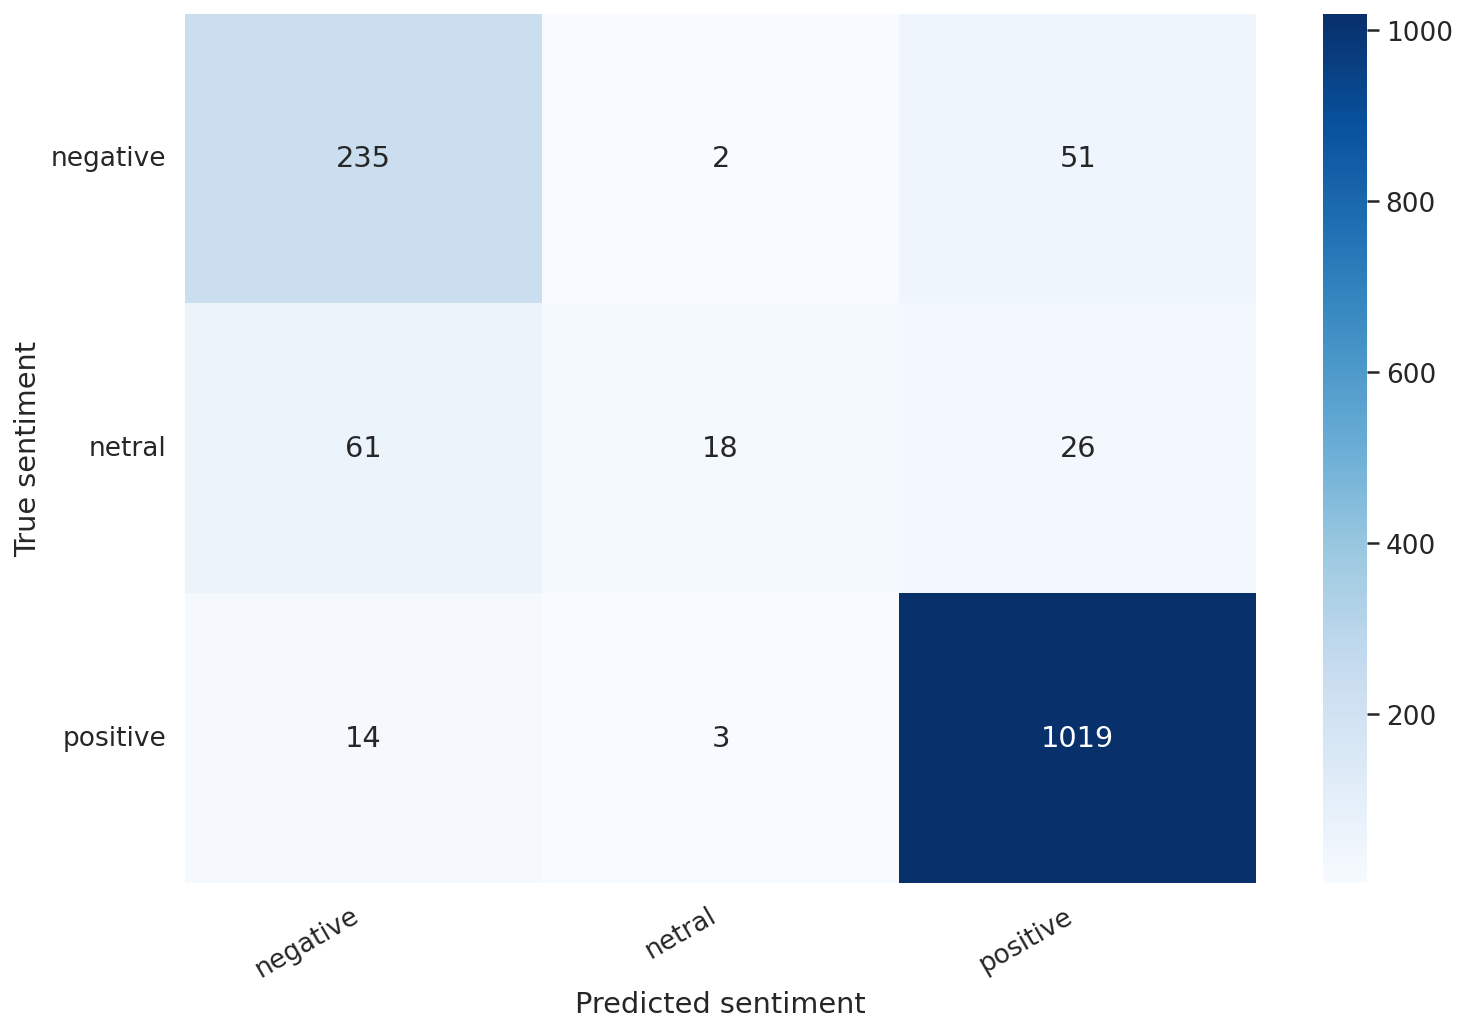

In [152]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test_, y_pred_smt)
baru_cm = pd.DataFrame(cm, index=class_names1, columns=class_names1)
show_confusion_matrix(baru_cm)

ROC AUC score: 0.9766211843934576


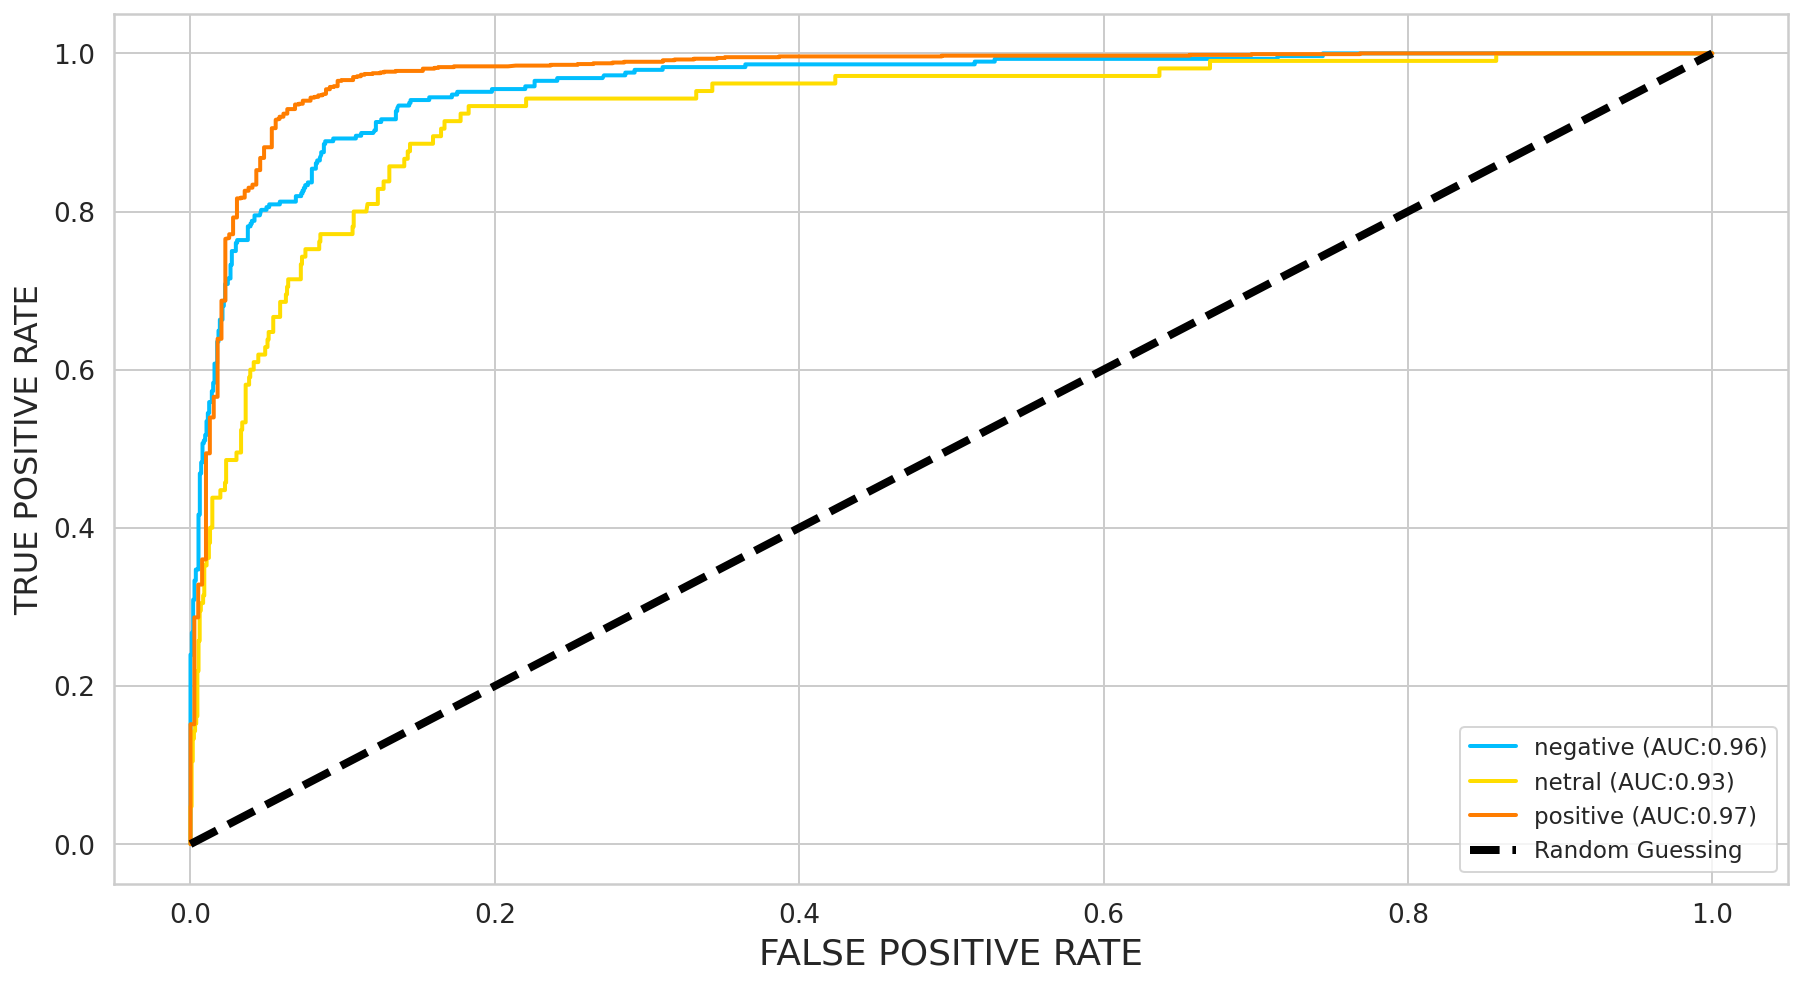

In [153]:
#ROC AUC

fig, c_ax = plt.subplots(1,1, figsize = (15,8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test_ , y_pred_probs_smt , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show();